<a href="https://colab.research.google.com/github/veronicayolanda/Python-Exercise/blob/main/Veronica_Yolanda_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

In [ ]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()
df_ecomm = pd.read_csv(io.BytesIO(uploaded['ecommerce_event.csv']))

Saving ecommerce_event.csv to ecommerce_event.csv


In [ ]:
uploaded_2 = files.upload()
df_user = pd.read_csv(io.BytesIO(uploaded_2['user_profile.csv']))

Saving user_profile.csv to user_profile.csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1.	Compare the revenue for each category using bar chart, sorted by highest revenue

In [ ]:
df_ecomm[df_ecomm.event_type=='purchase'].groupby('category').agg({'price':'sum'})

,price
category,
apparel,458.19
appliances,10406.17
auto,406.87
computers,4947.25
construction,455.49
electronics,130933.02
furniture,549.20
kids,105.48
sport,478.52


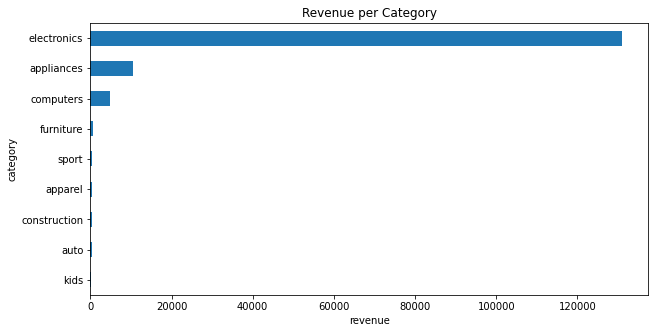

In [ ]:
df_ecomm[df_ecomm.event_type=='purchase'].groupby('category')['price'].sum().sort_values().plot.barh(figsize=(10, 5))
plt.title('Revenue per Category')
plt.xlabel('revenue')
plt.show()

### 2. Compare the revenue for each brand in smartphone subcategory using bar chart

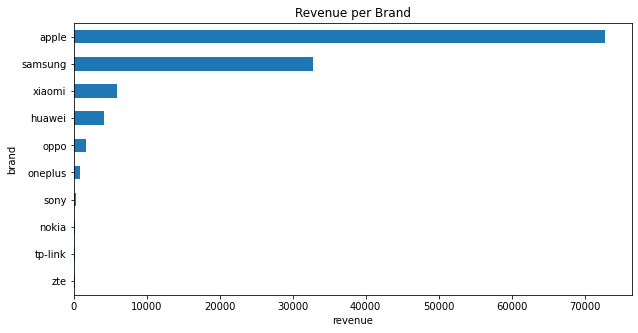

In [ ]:
df_ecomm[(df_ecomm.subcategory=='smartphone') & (df_ecomm.event_type=='purchase')].groupby(['brand'])['price'].sum().sort_values().plot.barh(figsize=(10,5))
plt.title('Revenue per Brand')
plt.xlabel('revenue')
plt.show()

### 3. Compare the total session view for each gender using bar chart, and change the color into green

In [ ]:
df_merge = pd.merge(df_ecomm, df_user, how = 'inner', on= 'user_id')
df_merge.head()

,event_date,event_type,product_id,category,subcategory,brand,price,user_id,user_session,gender,age
0,2019-10-23,view,1600600,computers,peripherals,hp,148.04,548757053,7b5e86eb-6c9f-4862-b9cb-20b773d64a75,Female,28
1,2019-10-28,view,1004238,electronics,smartphone,apple,1243.79,512471699,7b21fd53-8f8d-44f7-b126-fcb63b4a34df,Female,52
2,2019-10-31,view,1004566,electronics,smartphone,huawei,164.88,548430364,2e5a410f-0d20-41c9-82c1-aa1b4dcdd11d,Female,65
3,2019-10-12,view,1003310,electronics,smartphone,apple,696.13,558364479,587402bb-2083-4a8c-a874-f270e3408db1,Female,38
4,2019-10-28,view,4804295,electronics,audio,xiaomi,22.86,514732843,52ae3808-c842-4fbd-97a4-ea7c862aef35,Male,74


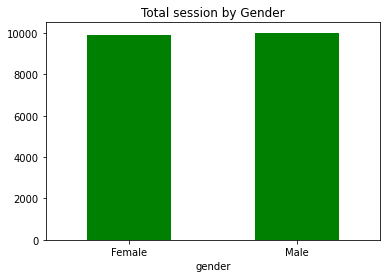

In [ ]:
df_merge.groupby('gender')['user_session'].nunique().sort_values().plot.bar(color='g')
plt.xticks(rotation=0)
plt.title('Total session by Gender')
plt.show()

###4. Show the distribution of electronics category price using histogram 

In [ ]:
df_ecomm[df_ecomm.category=='electronics']['price']

1        1243.79
2         164.88
3         696.13
4          22.86
5        2110.45
          ...   
19994     223.66
19996    1700.48
19997     126.90
19998     333.49
19999     133.59
Name: price, Length: 11799, dtype: float64

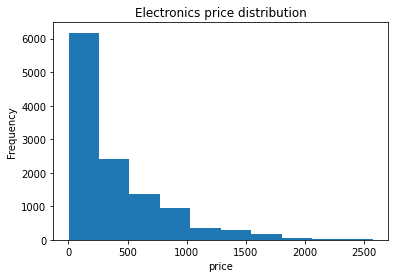

In [ ]:
df_ecomm[df_ecomm.category=='electronics']['price'].plot.hist()
plt.title('Electronics price distribution')
plt.xlabel('price')
plt.show()

### 5. Show the distribution of apple price using histogram


In [ ]:
df_apple = df_ecomm.loc[(df_ecomm['brand'] == 'apple')]


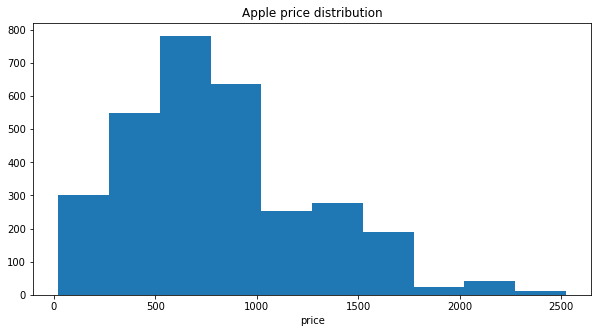

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.hist(df_apple['price'])  

ax.set_xlabel('price')    
ax.set_title("Apple price distribution") 
plt.show()

### 6. Compare the price distribution from each brand in smartphone subcategory using box plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


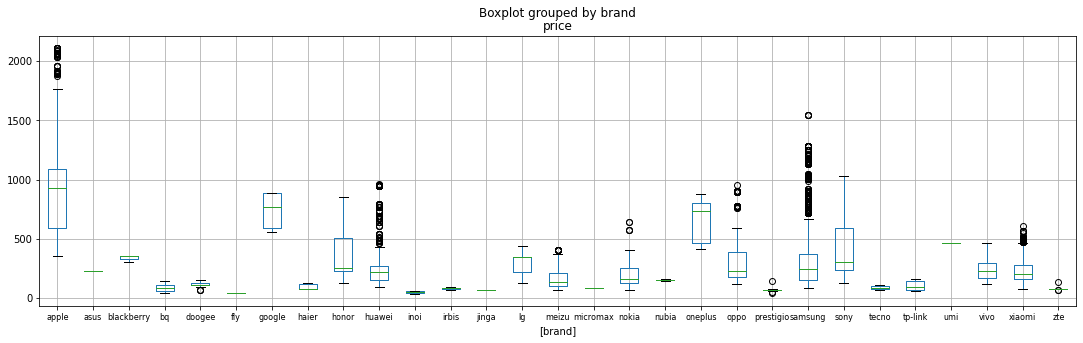

In [ ]:
df_ecomm[df_ecomm.subcategory=='smartphone'].boxplot(column=['price'], by=['brand'], figsize =(18,5))
plt.xticks(fontsize=8)
plt.show()

###7. Show the relationship between age and price using scatter plot

In [ ]:
df_merge = pd.merge(df_ecomm, df_user, how = 'inner', on= 'user_id')

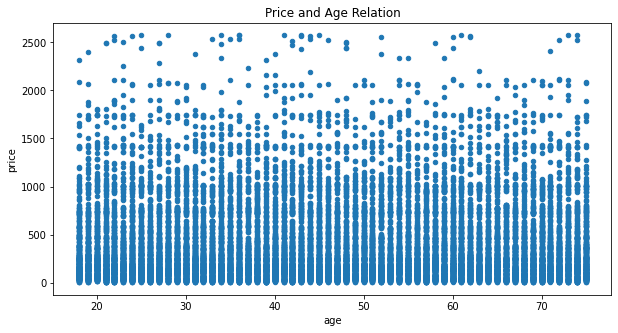

In [ ]:
df_merge.plot.scatter(x='age',y='price',figsize=(10, 5))
plt.title("Price and Age Relation") 
plt.show()

### 8. Show the conversion rate (total session purchase/total session view) per day using line chart

In [ ]:
df_purchase_daily = df_ecomm.loc[df_ecomm['event_type'] == 'purchase'].groupby('event_date', as_index = False).agg(num_session_purchase = ('user_session', 'nunique'))

df_view_daily = df_ecomm.loc[df_ecomm['event_type'] == 'view'].groupby('event_date', as_index = False).agg(num_session_view = ('user_session', 'nunique'))

df_merge_daily = pd.merge(df_purchase_daily, df_view_daily,  how = 'inner', on= 'event_date').sort_values('event_date')

df_merge_daily.head()

,event_date,num_session_purchase,num_session_view
0,2019-10-01,6,591
1,2019-10-02,8,511
2,2019-10-03,12,525
3,2019-10-04,21,662
4,2019-10-05,15,622


In [ ]:
df_merge_daily['conversion_rate'] = df_merge_daily['num_session_purchase']/df_merge_daily['num_session_view']
df_merge_daily

,event_date,num_session_purchase,num_session_view,conversion_rate
0,2019-10-01,6,591,0.010152
1,2019-10-02,8,511,0.015656
2,2019-10-03,12,525,0.022857
3,2019-10-04,21,662,0.031722
4,2019-10-05,15,622,0.024116
5,2019-10-06,13,558,0.023297
6,2019-10-07,10,550,0.018182
7,2019-10-08,16,560,0.028571
8,2019-10-09,11,572,0.019231
9,2019-10-10,17,591,0.028765


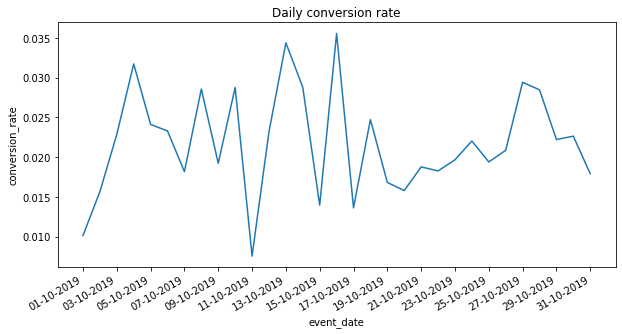

In [ ]:
df_merge_daily['event_date'] = pd.to_datetime(df_merge_daily['event_date'])

fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(df_merge_daily['event_date'], df_merge_daily['conversion_rate'])  


ax.set_xlabel('event_date')  
ax.set_ylabel('conversion_rate')  
ax.set_title("Daily conversion rate") 

#mengubah event_date menjadi datetime
import matplotlib.dates as mdates 

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()

plt.show()


### 9. Show the top category with highest conversion rate (total purchase/total view) all time

In [ ]:
df_purchase_cat =df_ecomm.loc[df_ecomm['event_type'] == 'purchase'].groupby('category', as_index = False).agg(num_session_purchase = ('user_session', 'nunique'))

df_view_cat =df_ecomm.loc[df_ecomm['event_type'] == 'view'].groupby('category', as_index = False).agg(num_session_view = ('user_session', 'nunique'))

df_merge_cat = pd.merge(df_purchase_cat, df_view_cat,  how = 'inner', on= 'category')

df_merge_cat['conversion_rate'] = df_merge_cat['num_session_purchase']/df_merge_cat['num_session_view']

df_merge_cat = df_merge_cat.sort_values('conversion_rate')

df_merge_cat

,category,num_session_purchase,num_session_view,conversion_rate
0,apparel,6,891,0.006734
7,kids,2,295,0.006780
6,furniture,3,416,0.007212
8,sport,1,130,0.007692
3,computers,14,1656,0.008454
2,auto,5,550,0.009091
4,construction,4,407,0.009828
1,appliances,63,3390,0.018584
5,electronics,315,10923,0.028838


Text(0.5, 1.0, 'Category conversion rate')

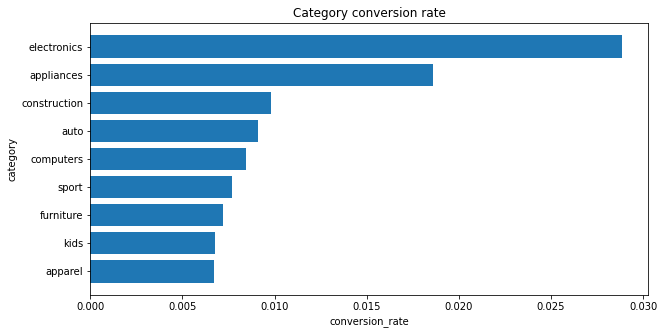

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.barh(df_merge_cat['category'], df_merge_cat['conversion_rate'])  


ax.set_xlabel('conversion_rate')  
ax.set_ylabel('category')  
ax.set_title("Category conversion rate") 

### 10. Show the top brand in smartphone subcategory with highest conversion rate (total purchase/total view) all time

In [ ]:
df_purchase_brand =df_ecomm.loc[(df_ecomm['subcategory'] == 'smartphone') & (df_ecomm['event_type'] == 'purchase')].groupby('brand', as_index = False).agg(num_session_purchase = ('user_session', 'nunique'))

df_view_brand =df_ecomm.loc[(df_ecomm['subcategory'] == 'smartphone') & (df_ecomm['event_type'] == 'view')].groupby('brand', as_index = False).agg(num_session_view = ('user_session', 'nunique'))

df_merge_brand = pd.merge(df_purchase_brand, df_view_brand,  how = 'inner', on= 'brand')

df_merge_brand['conversion_rate'] = df_merge_brand['num_session_purchase']/df_merge_brand['num_session_view']

df_merge_brand = df_merge_brand.sort_values('conversion_rate').reset_index(drop=True)

df_merge_brand

,brand,num_session_purchase,num_session_view,conversion_rate
0,xiaomi,27,1585,0.017035
1,nokia,1,53,0.018868
2,oneplus,1,47,0.021277
3,sony,1,44,0.022727
4,huawei,21,674,0.031157
5,oppo,10,296,0.033784
6,apple,83,2248,0.036922
7,samsung,106,2591,0.040911
8,tp-link,1,19,0.052632
9,zte,2,8,0.250000


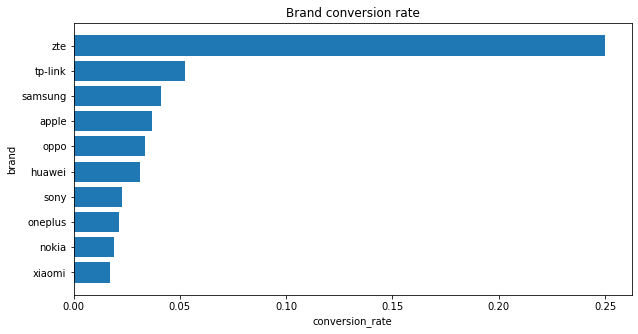

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.barh(df_merge_brand['brand'], df_merge_brand['conversion_rate'])  

ax.set_xlabel('conversion_rate')  
ax.set_ylabel('brand')  
ax.set_title("Brand conversion rate") 
plt.show()